## Imports

In [9]:
import os, sys
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd

load_dotenv()

DATA_PATH = Path(os.getenv("DATA_PATH"))

# only for .ipynb because relative imports don't work
root_path = (DATA_PATH.parent) 
os.chdir(str(root_path))

import src.training.plotting as p
import src.training.pre_training as t
import src.training.postprocessing as pp

from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


## Prepare Data

In [24]:
df_music = t.get_music_df()
df_artist = t.get_artist_df()
df_lyric = t.get_lyric_df()

In [25]:
plot_list = []

In [ ]:
y_original = df_music["popularity"]
y_classes = df_music["popularity"].apply(t.encode_popularity)
X = df_music.drop("popularity", axis=1)

## Distribution of Popularity

In [ ]:
# RUS sampled and encoded popularity
X_1, y_1 = RandomUnderSampler(random_state=42).fit_resample(X, y_classes)

# Include: Unsampled raw / encoded and RUS encoded popularity
plot_list.extend([
    (plt.bar, {"x": list(set(y_classes)), "height": pp.count_distribution(y_classes)},
    "popularity", "count", "Distribution of Popularity classes"),
    (plt.bar, {"x": list(set(y_original)), "height": pp.count_distribution(y_original)},
    "popularity", "count", "Distribution of Popularity raw"),
    (plt.bar, {"x": list(set(y_1)), "height": pp.count_distribution(y_1)},
    "popularity", "count", "Distribution of Popularity classes with RUS")]
)

## Music Features vs. Popularity

In [ ]:
# Add each feature plot to list
for name, values in pd.DataFrame(X).items():
    plot_list.extend(
        [
        # (plt.scatter, {"x": values, "y": y_classes},
        # name, "encoded popularity", f"Distribution of {name}"),
        (plt.scatter, {"x": values, "y": y_original},
        name, "popularity", f"Distribution of {name}")
        ]
    )

## Artist Features vs. Popularity

In [26]:
# scaling
max_followers = df_artist["followers"].max()
df_artist["followers"] = df_artist["followers"].apply(lambda x: x / (max_followers / 100))
df_artist["genre_name"] = df_artist["genre_name"].apply(t.encode_genres)

X_art = df_artist.drop("popularity", axis=1)
y_art = df_artist["popularity"].apply(t.encode_popularity)

# X_art, y_art = RandomUnderSampler(random_state=42).fit_resample(X_art, y_art)


In [27]:
# Add each feature plot to list
for name, values in pd.DataFrame(X_art).items():
    plot_list.extend(
        [
        # (plt.scatter, {"x": values, "y": y_classes},
        # name, "encoded popularity", f"Distribution of {name}"),
        (plt.scatter, {"x": values, "y": y_art},
        f"Distribution of {name}", name, "popularity")
        ]
    )

## Save/display plots

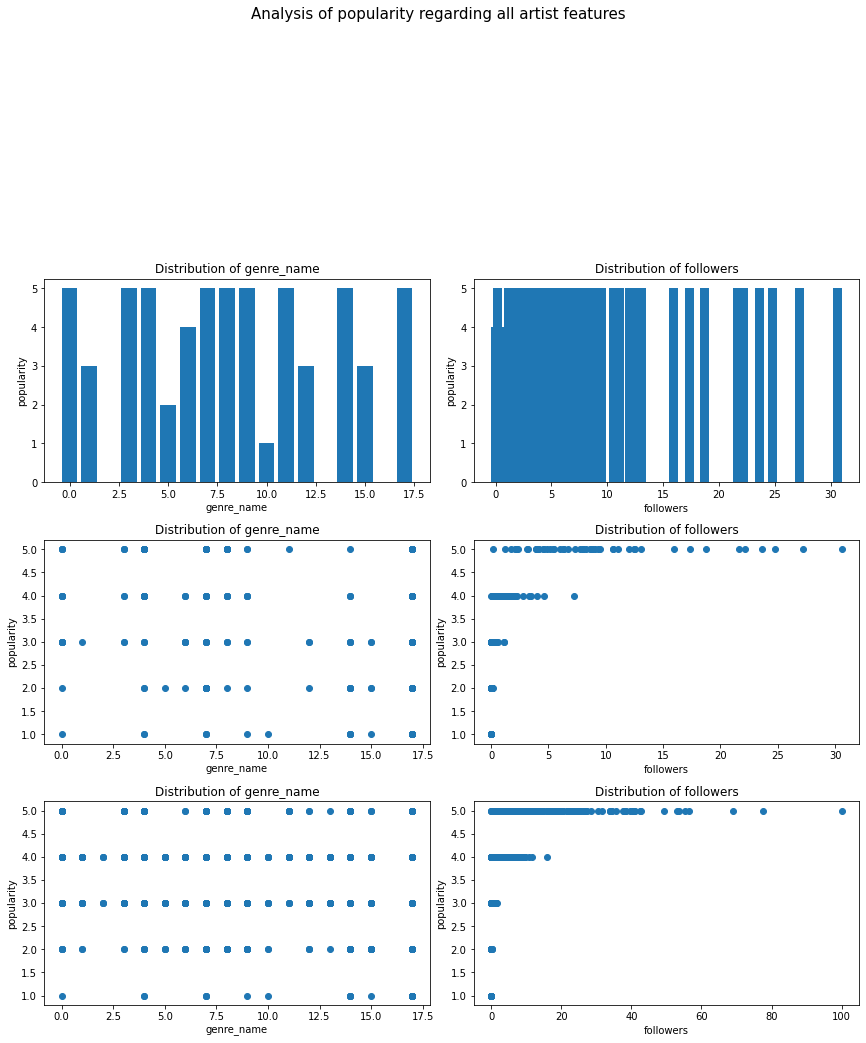

In [28]:
# params
save_plots = False
n_cols = 2
document_title = "Analysis of popularity regarding all artist features"
document_folder = "all" # lyrics, model, artist, all

# save/display plots as jpg
p.plots_from_list(document_title, plot_list, document_folder, cols=n_cols, save=save_plots)